# Análisis preliminar bioma eukaryota

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pcolors
from sklearn import preprocessing
from sklearn import metrics
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

## Lectura de datos
### Número de lecturas

Vamos a considerar solamente auqellos estudios que tienen un número de lecturas tras la limpieza mayor del umbral

In [46]:
umbral = 1_200_000

In [47]:
ttable = pd.read_csv('data/concat_track_table.tsv', sep='\t', index_col='Sample')

In [48]:
valid = ttable[ttable.bowtie >= umbral].index.to_list()

### Tabla de conteos

In [49]:
# Carga el dataset
df = pd.read_csv('data/presence_absence_genus_table.tsv', sep='\t', index_col='Sample')

In [50]:
df.columns

Index(['4930', '4910', '5073', '12967', '29832', '13366', '4958', '5740',
       '4919', '4895', '5758', '5052', '79922', '507510', '4838', '688353',
       '13705', '1535326', '55193', '604195', '33196', '6953', '5340', '38944',
       '5269', '265084', '5598', '231006', '1052105', '4948', '45234',
       '374468', '5579', '71245', '311780', '6237', '1910789', '5552', '5475',
       '5583', '36910', '51027', '47182', '5533', '45787', '5806', '95601',
       '64644', '6181', '52429', '34622', '2849', '43971', '4953', '766728',
       '476763', '77850', '5027', '148959', '36913', '300275', '599737',
       '4842'],
      dtype='object')

In [51]:
df

,4930,4910,5073,12967,29832,13366,4958,5740,4919,4895,...,4953,766728,476763,77850,5027,148959,36913,300275,599737,4842
Sample,,,,,,,,,,,,,,,,,,,,,
SAMEA2041939,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA2042005,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA2041924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA1964895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA2042001,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR260266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERR260260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERR260234,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Limpieza de datos de presencia/ausencia

Para limpiar los datos utilizaremos los siguientes criterios:
 - Elimar los estudios cuyo número de secuencias está por debajo del umbral. 
 - Eliminamos todas las filas que no contienen ninguna eukaryota.
 - Eliminar los taxones que no aparecen en ningua muestra.

In [52]:
# Número de lecturas por debajo del umbral
df = df.loc[valid]
df

,4930,4910,5073,12967,29832,13366,4958,5740,4919,4895,...,4953,766728,476763,77850,5027,148959,36913,300275,599737,4842
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11070334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13336903,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336940,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Filas que no contienen ninguna eukaryota
df = df[df.sum(axis=1) > 0]
df

,4930,4910,5073,12967,29832,13366,4958,5740,4919,4895,...,4953,766728,476763,77850,5027,148959,36913,300275,599737,4842
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11070348,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070365,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070366,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070368,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070369,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13336903,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336940,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Taxones que no aparecen en ningua muestra
print('Antes:', len(df.columns), end=',')
df = df.loc[:, df.sum(axis=0) > 0]
print(' Despues:', len(df.columns))

Antes: 63, Despues: 63


In [7]:
# Normalización
scaler = preprocessing.StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

### Metadatos

In [55]:
md = pd.read_csv('data/GLOBAL_METADATA.csv', sep='\t', index_col='file_sample_name')

In [56]:
md

,run_accession,sample_accession,study_accession,study_code,SampleID,instrument_model,DNA_extraction_kit,individual,country,region,...,host_age_group,host_sex,host_BMI,host_diet,host_ethnicity,familyID,family_level,sibling_twins,twin_type,pregnancy_status
file_sample_name,,,,,,,,,,,,,,,,,,,,,
SRR7658579,SRR7658579,SAMN09781768,PRJNA485056,Pasolli2019,A55_01_1FE,Illumina HiSeq 2500,Qiagen,A55_01_1FE,Madagascar,North-eastern Madagascar,...,Adult,Female,22.31,NaN,NaN,NaN,NaN,No,NaN,NaN
SRR7658580,SRR7658580,SAMN09781769,PRJNA485056,Pasolli2019,V12_01_2FE,Illumina HiSeq 2500,Qiagen,V12_01_2FE,Madagascar,North-eastern Madagascar,...,Adult,Male,21.11,NaN,NaN,NaN,NaN,No,NaN,NaN
SRR7658581,SRR7658581,SAMN09781764,PRJNA485056,Pasolli2019,A32_01_1FE,Illumina HiSeq 2500,Qiagen,A32_01_1FE,Madagascar,North-eastern Madagascar,...,Adult,Male,21.51,NaN,NaN,NaN,NaN,No,NaN,NaN
SRR7658582,SRR7658582,SAMN09781765,PRJNA485056,Pasolli2019,A94_01_1FE,Illumina HiSeq 2500,Qiagen,A94_01_1FE,Madagascar,North-eastern Madagascar,...,Adult,Male,23.44,NaN,NaN,NaN,NaN,No,NaN,NaN
SRR7658583,SRR7658583,SAMN09781766,PRJNA485056,Pasolli2019,A39_04_1FE,Illumina HiSeq 2500,Qiagen,A39_04_1FE,Madagascar,North-eastern Madagascar,...,Adult,Male,22.48,NaN,NaN,NaN,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HV5,ERR527040,SAMEA2582012,PRJEB6337,Qin2014,HV5_Run4,Illumina HiSeq 2000,NaN,HV5,China,NaN,...,Adult,Male,23.53,NaN,NaN,NaN,NaN,No,NaN,NaN
HV6,ERR527041,SAMEA2582013,PRJEB6337,Qin2014,HV6_Run4,Illumina HiSeq 2000,NaN,HV6,China,NaN,...,Adult,Male,23.94,NaN,NaN,NaN,NaN,No,NaN,NaN
HV7,ERR527042,SAMEA2582014,PRJEB6337,Qin2014,HV7_Run4,Illumina HiSeq 2000,NaN,HV7,China,NaN,...,Elder,Male,22.77,NaN,NaN,NaN,NaN,No,NaN,NaN


In [57]:
todo = df.merge(md, left_index=True, right_index=True)

### Metadatos taxonómicos

In [58]:
taxa = pd.read_csv('data/taxonomy_genus_table.tsv', sep='\t', index_col='TaxID')
taxa

,phylum,class,order,family,genus
TaxID,,,,,
4930,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces
4910,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Kluyveromyces
5073,Ascomycota,Eurotiomycetes,Eurotiales,Aspergillaceae,Penicillium
12967,NaN,Bigyra,Opalinata,Blastocystidae,Blastocystis
29832,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycodaceae,Hanseniaspora
...,...,...,...,...,...
148959,Basidiomycota,Wallemiomycetes,Wallemiales,Wallemiaceae,Wallemia
36913,Ascomycota,Saccharomycetes,Saccharomycetales,Debaryomycetaceae,Lodderomyces
300275,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Lachancea


## PCA

In [12]:
# PCA...
pca = decomposition.PCA(n_components=2)
Y_sklearn = pca.fit_transform(df.T)
print("Analisis del PCA:")
#print('   Components:', pca.components_)
print('   Explained variance:', pca.explained_variance_)
print('   Explained Var Ratio:', pca.explained_variance_ratio_)

Analisis del PCA:
   Explained variance: [113.21300565  89.34893526]
   Explained Var Ratio: [0.05454046 0.04304392]


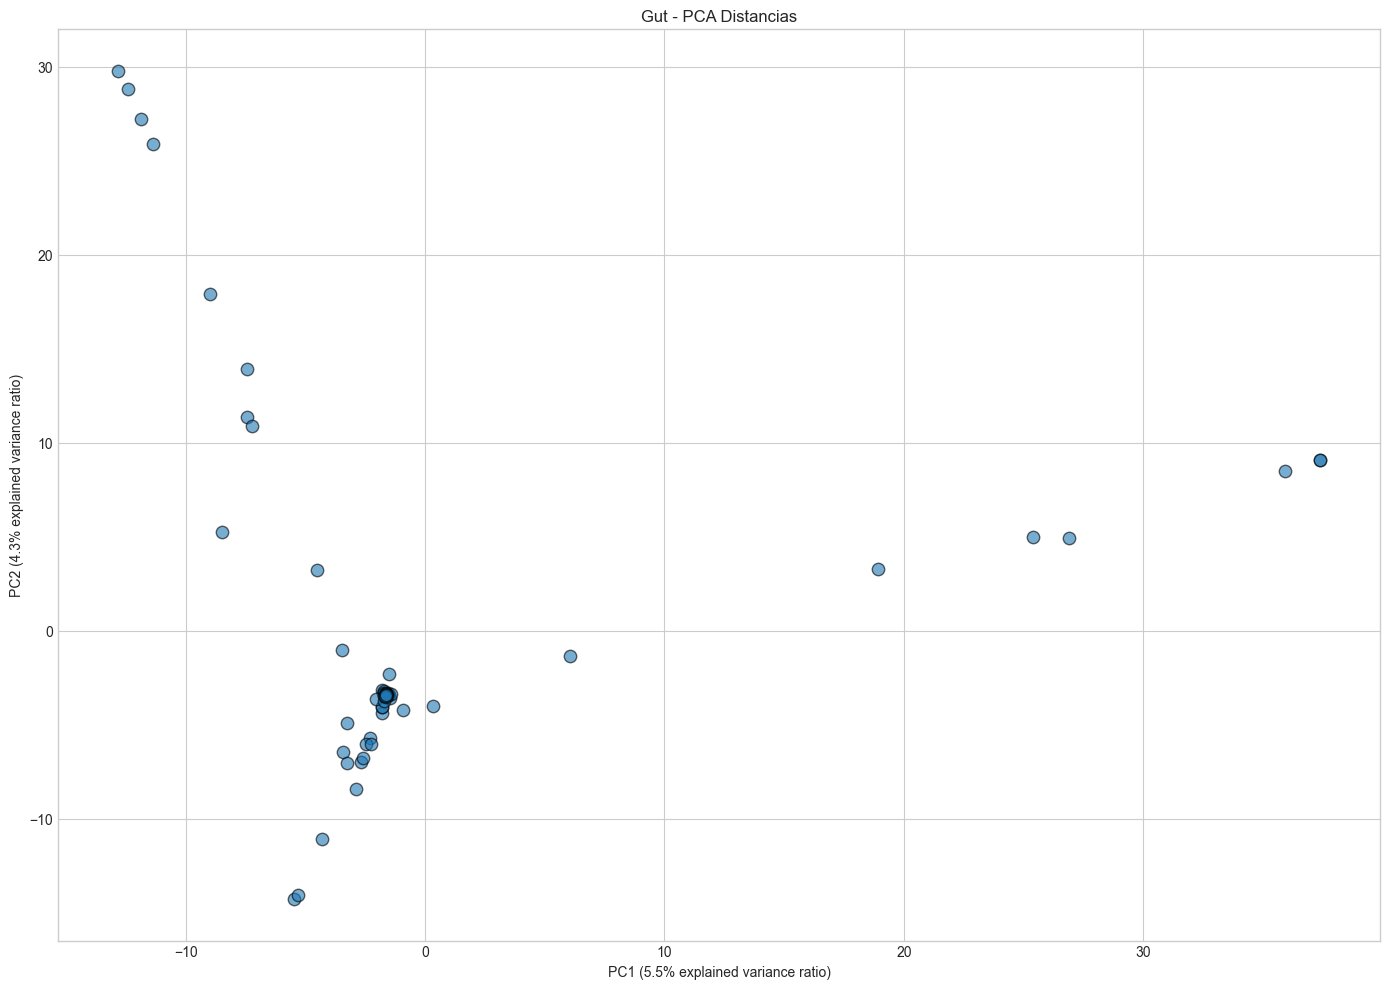

In [13]:
# Gráfica del PCA
#
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(14,10))
    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], s=80, edgecolor='black', alpha=0.6)

    pc = 100.0 * pca.explained_variance_ratio_
    plt.xlabel('PC1 (%.1f%% explained variance ratio)' % pc[0])
    plt.ylabel('PC2 (%.1f%% explained variance ratio)' % pc[1])
    plt.title('Gut - PCA Distancias')
    #plt.legend(loc='best', frameon=True, shadow=False)
    plt.tight_layout()
    #plt.savefig('pca_genero_distance_continent.pdf')
    plt.show()
#endwith

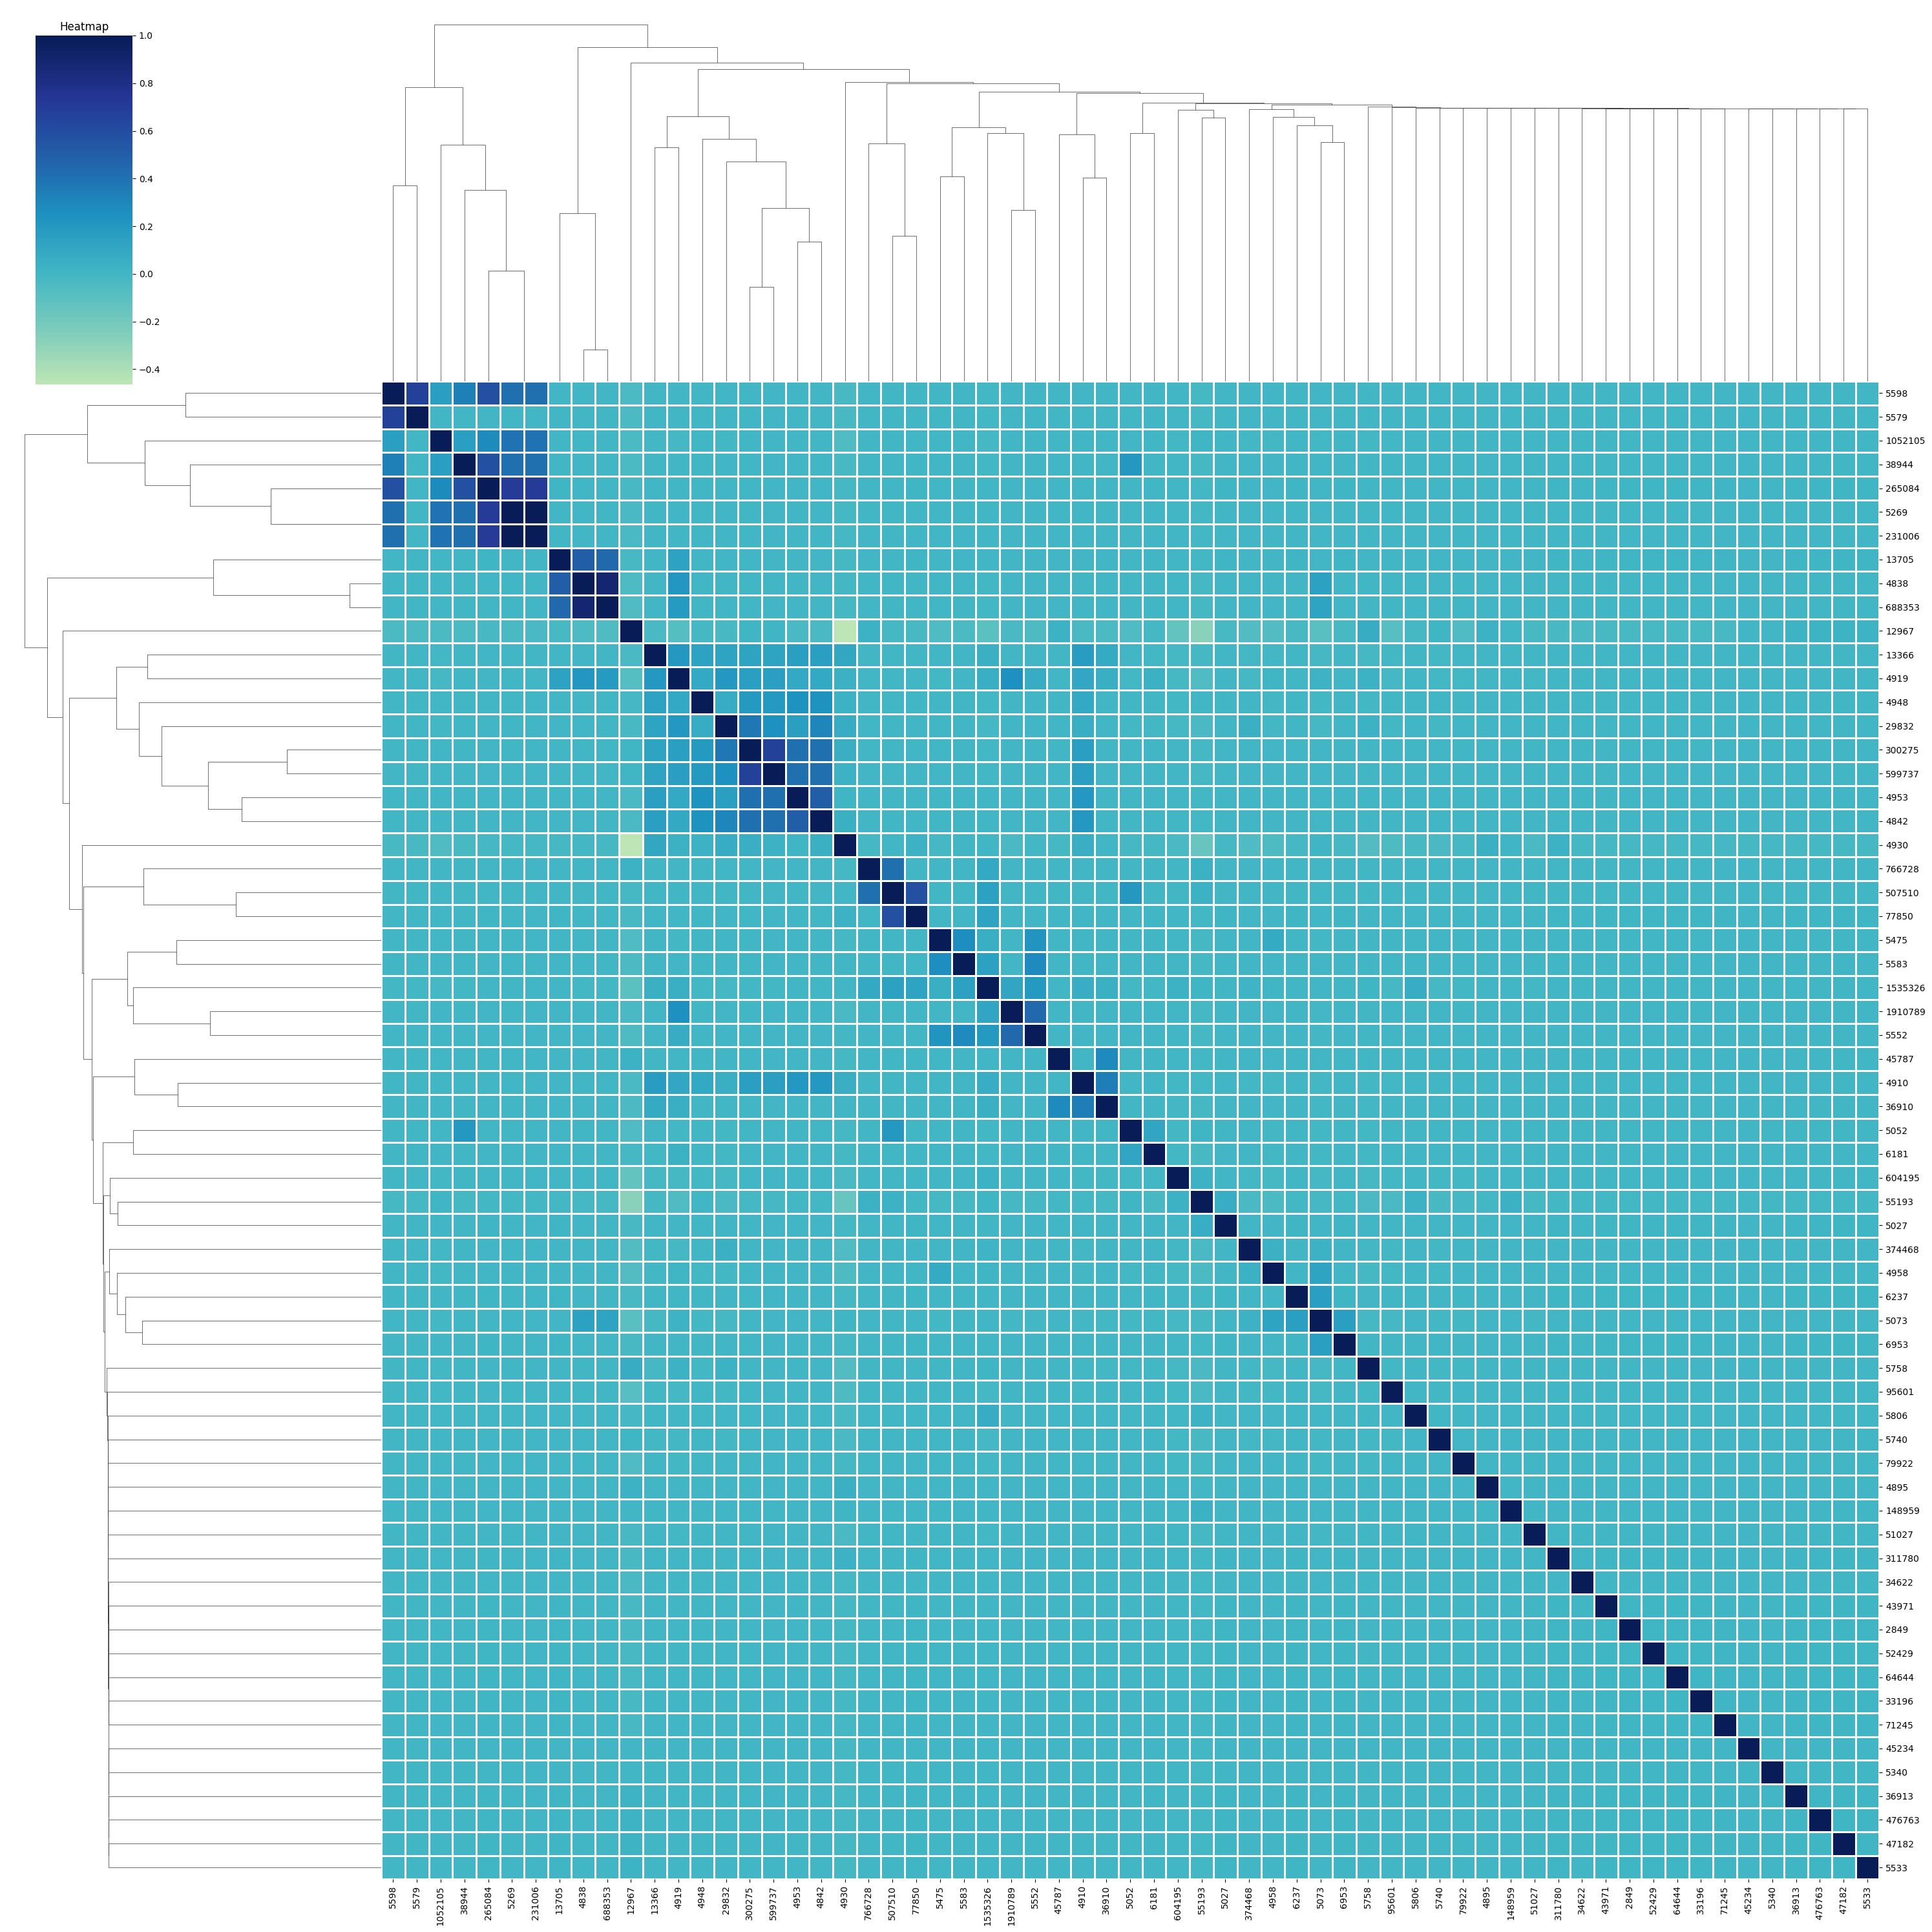

In [14]:
g = sns.clustermap(df.corr(), center=0, cmap="YlGnBu", linewidths=.75, figsize=(30, 30))
#g.fig.suptitle(heatmap)
#g.ax_heatmap.set_yticklabels()
#g.ax_heatmap.set_xticklabels(dft.lifestyle)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.title("Heatmap")
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
g.savefig('heatmap.pdf')
plt.show()

## Heatmap con nombre de genus...

In [59]:
# Cambia el número de columna por nombre de genus...
taxid = taxa.index.to_list()
taxid = [str(t) for t in taxid]
genus = taxa.genus.to_list()
torename = dict(zip(taxid, genus))

In [60]:
dfr = df.rename(columns=torename)
dfr

,Saccharomyces,Kluyveromyces,Penicillium,Blastocystis,Hanseniaspora,Brettanomyces,Debaryomyces,Giardia,Pichia,Schizosaccharomyces,...,Zygosaccharomyces,Meyerozyma,Rhinocypha,Kodamaea,Pyrenophora,Wallemia,Lodderomyces,Lachancea,Wickerhamomyces,Rhizopus
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11070348,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070365,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070366,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070368,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR11070369,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13336903,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336940,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR13336941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#cbar = {-1.0:'Very strong(-)', -0.80:'Strong (-)', -0.6:'Moderate (-)', -0.4:'Weak (-)', -0.2:'Very weak (-)', 0.2:'Very weak (+)', 0.4:'Weak (+)', 0.6:'Moderate (+)', 0.8:'Strong (+)', 1.0:'Very strong (+)'}
cbar = {'Very strong(-)':-1, 'Strong (-)':-0.8, 'Moderate (-)':-0.6, 'Weak (-)':-0.4, 'Very weak (-)':-0.2, 'Very weak (+)':0.2, 'Weak (+)':0.4, 'Moderate (+)':0.6, 'Strong (+)':0.8, 'Very strong (+)':1}

In [95]:
pcorr = dfr.corr()

In [140]:
#bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0]
#labels = ['Very strong(-)', 'Strong (-)', 'Moderate (-)', 'Weak (-)', 'Very weak (-)', 'Very weak (+)', 'Weak (+)', 'Moderate (+)', 'Strong (+)', 'Very strong (+)']
bins = [-0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Weak (-)', 'Very weak (-)', '0.0', 'Very weak (+)', 'Weak (+)', 'Moderate (+)', 'Strong (+)', 'Very strong (+)']

In [93]:
#g = sns.clustermap(dfr.corr(), center=0, cmap="YlGnBu", linewidths=.75, figsize=(30, 30))
g = sns.clustermap(pcorr_binned, center=0, cmap="vlag", linewidths=.75, figsize=(30, 30), metric='euclidean')
#g.fig.suptitle(heatmap)
#g.ax_heatmap.set_yticklabels()
#g.ax_heatmap.set_xticklabels(dft.lifestyle)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=18)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=16)  # For x axis
g.ax_heatmap.set_xlabel('Genus', fontsize=20)
g.ax_heatmap.set_ylabel('Genus', fontsize=20)
plt.title("Genus correlation")
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
#g.savefig('heatmap_genus.pdf')
plt.show()
plt.close()

ValueError: Unsupported dtype object

In [97]:
pcorr_binned

,Saccharomyces,Kluyveromyces,Penicillium,Blastocystis,Hanseniaspora,Brettanomyces,Debaryomyces,Giardia,Pichia,Schizosaccharomyces,...,Zygosaccharomyces,Meyerozyma,Rhinocypha,Kodamaea,Pyrenophora,Wallemia,Lodderomyces,Lachancea,Wickerhamomyces,Rhizopus
0,Strong (+),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very weak (-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very weak (-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Moderate (-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Very weak (-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very weak (-)
3965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very weak (-)
3966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weak (+)
3967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weak (+)


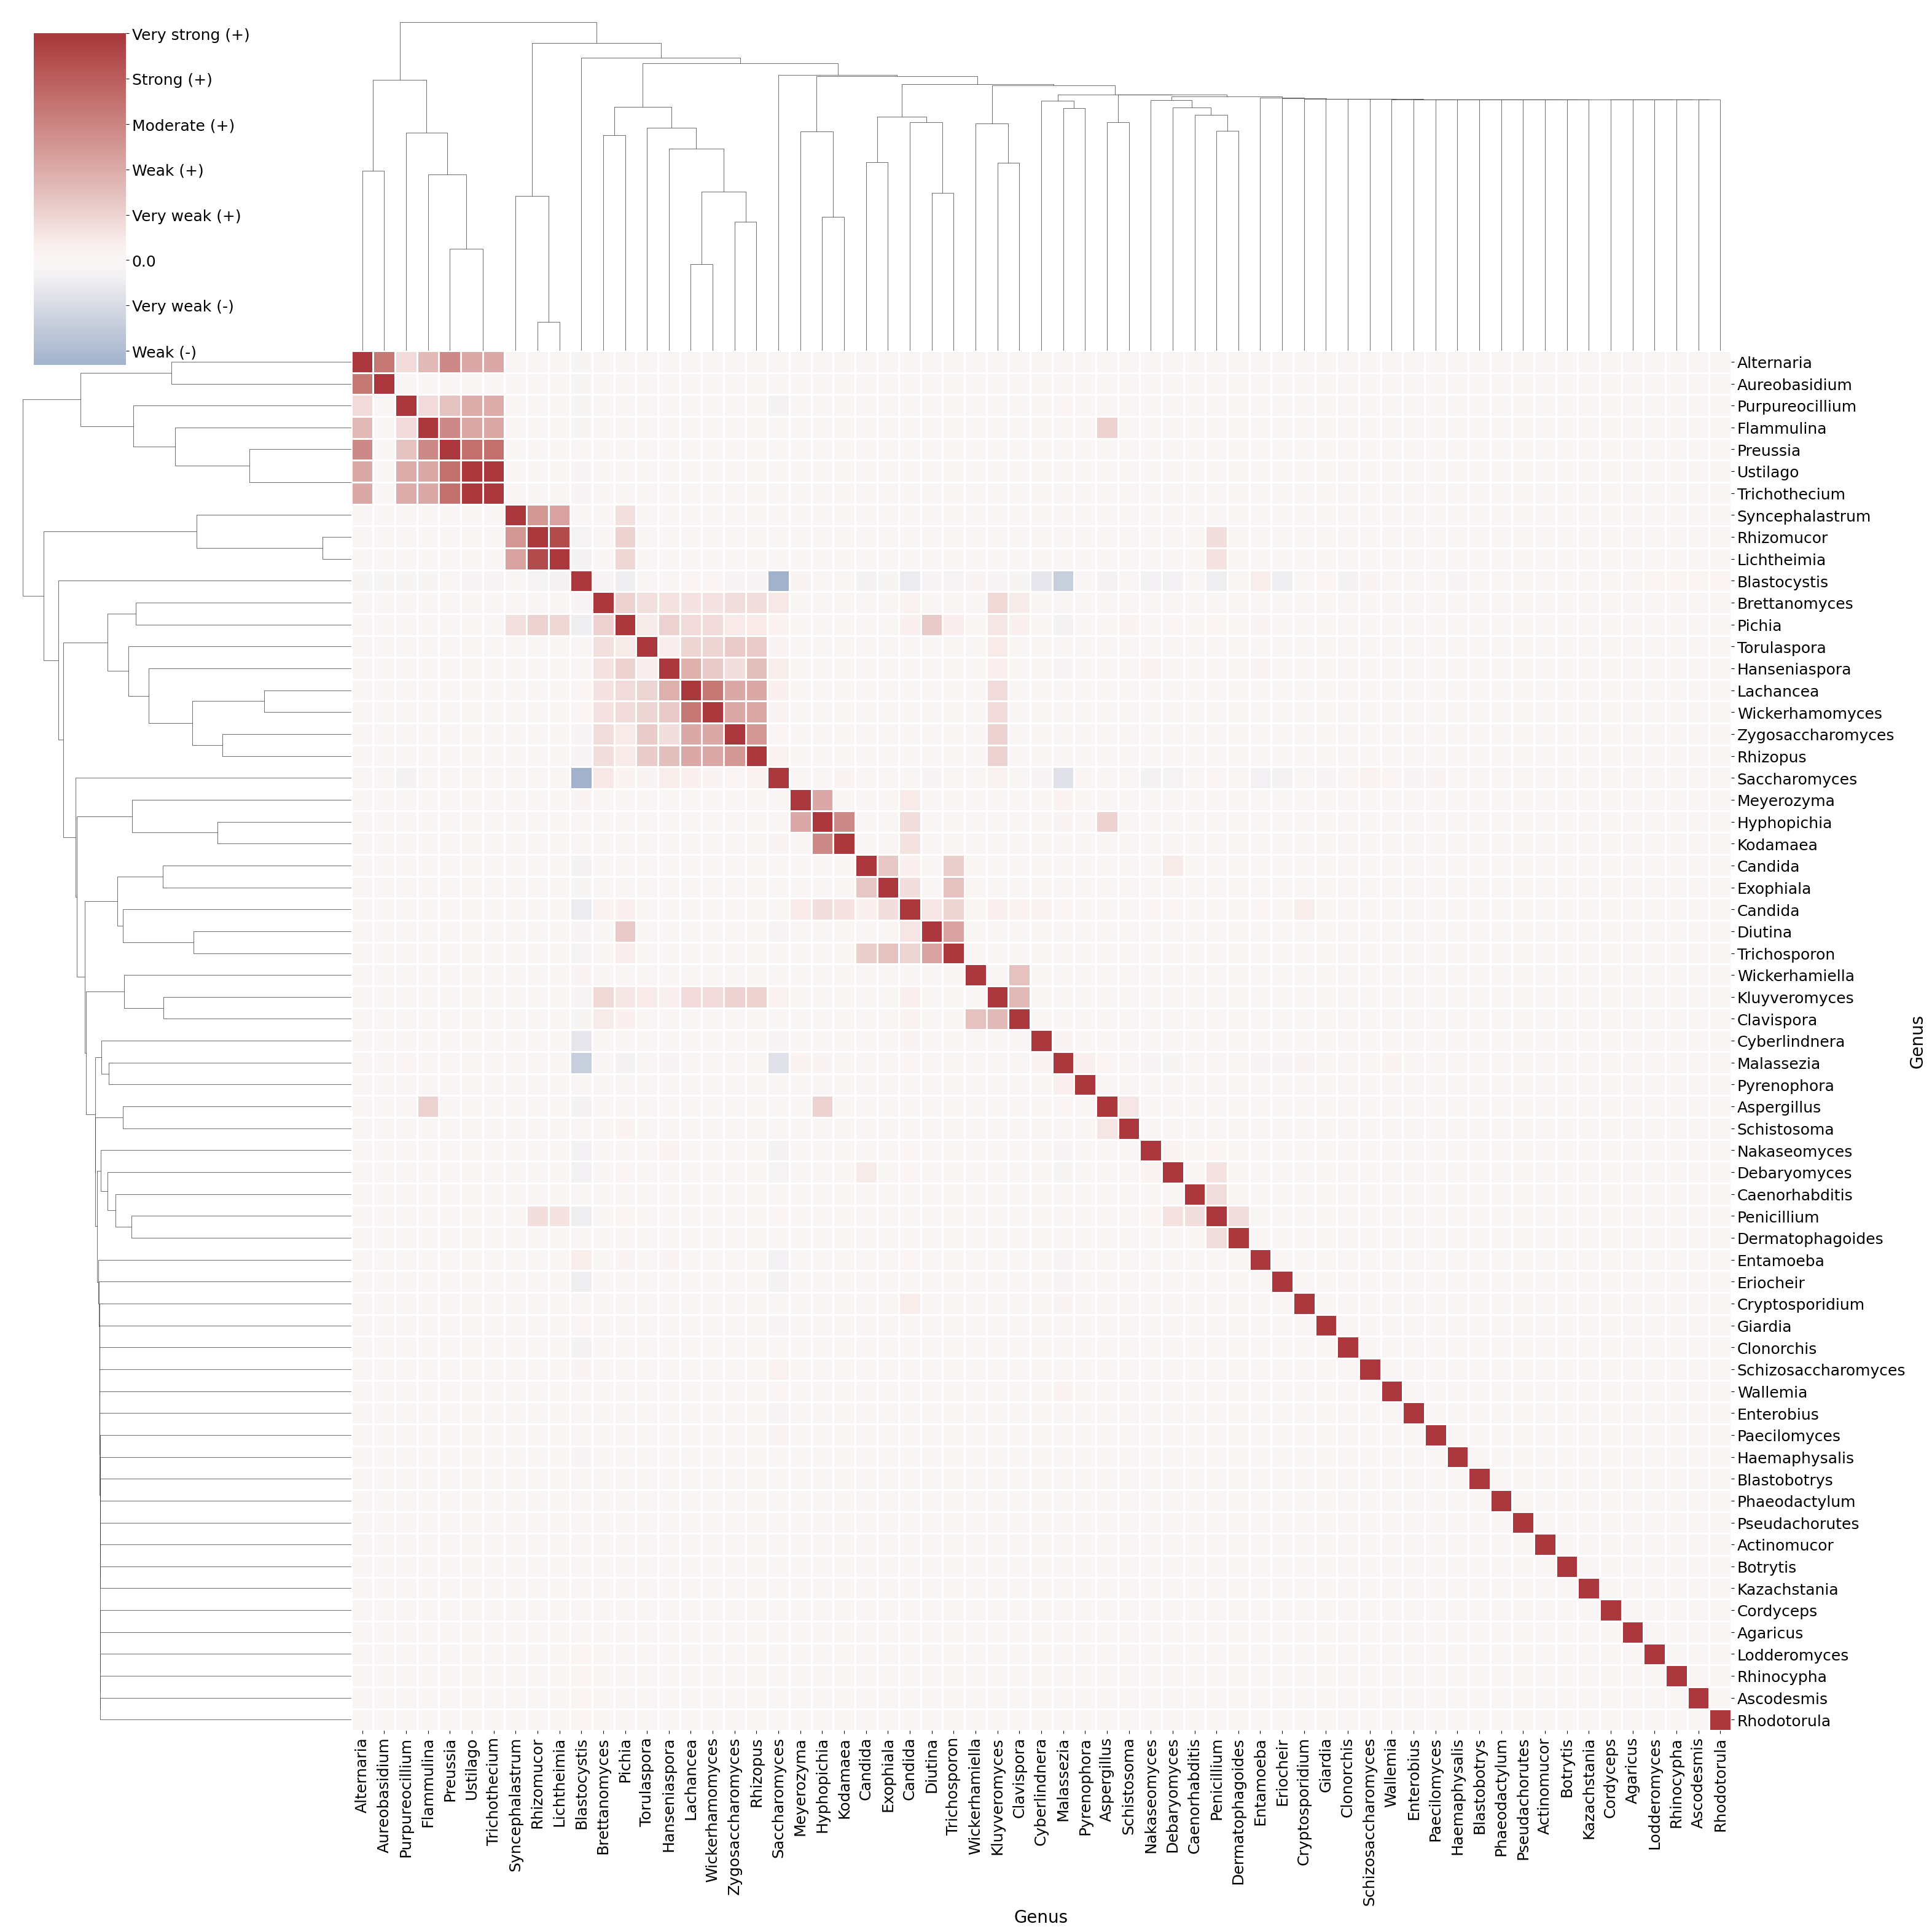

In [142]:
#g = sns.clustermap(dfr.corr(), center=0, cmap="YlGnBu", linewidths=.75, figsize=(30, 30))
g = sns.clustermap(dfr.corr(), center=0, cmap="vlag", linewidths=.75, figsize=(30, 30), metric='euclidean')

plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=18)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=18)  # For x axis

#cbar = plt.getp(g.ax_cbar)
fig = g.figure
cbar = g.ax_cbar
#cbar = fig.colorbar(g.cax, ticks=bins, orientation='vertical')
cbar.set_yticks(bins)
cbar.set_yticklabels(labels, fontsize=18)  # horizontal colorbar
#plt.setp(g.cbar(cbar))

g.ax_heatmap.set_xlabel('Genus', fontsize=20)
g.ax_heatmap.set_ylabel('Genus', fontsize=20)
#plt.title("Genus correlation")
g.savefig('heatmap_genus.pdf')
plt.show()
plt.close()

In [132]:
cbar.set_xticks(bins)

In [67]:
dfr.corr()

,Saccharomyces,Kluyveromyces,Penicillium,Blastocystis,Hanseniaspora,Brettanomyces,Debaryomyces,Giardia,Pichia,Schizosaccharomyces,...,Zygosaccharomyces,Meyerozyma,Rhinocypha,Kodamaea,Pyrenophora,Wallemia,Lodderomyces,Lachancea,Wickerhamomyces,Rhizopus
Saccharomyces,1.000000,0.045171,0.006006,-0.462871,0.073316,0.098700,-0.047216,-0.038786,0.038173,0.042732,...,0.010153,-0.022426,-0.015854,0.030209,-0.015854,0.010153,-0.015854,0.052348,0.025741,0.042732
Kluyveromyces,0.045171,1.000000,-0.011607,-0.029976,0.051467,0.175084,-0.009055,-0.005757,0.107084,-0.002450,...,0.194374,-0.002450,-0.001732,-0.001732,-0.001732,-0.002450,-0.001732,0.157743,0.157743,0.194374
Penicillium,0.006006,-0.011607,1.000000,-0.095473,-0.015133,-0.014781,0.130789,-0.010672,0.020652,-0.004541,...,-0.004541,-0.004541,-0.003210,-0.003210,-0.003210,-0.004541,-0.003210,-0.005563,-0.005563,-0.004541
Blastocystis,-0.462871,-0.029976,-0.095473,1.000000,-0.024500,-0.029221,-0.063773,0.009458,-0.086100,0.026776,...,-0.035791,0.026776,0.018929,-0.025302,-0.025302,-0.004508,0.018929,0.007252,0.007252,-0.035791
Hanseniaspora,0.073316,0.051467,-0.015133,-0.024500,1.000000,0.130628,-0.011805,-0.007506,0.198609,-0.003194,...,0.148435,-0.003194,-0.002258,-0.002258,-0.002258,-0.003194,-0.002258,0.367589,0.243755,0.300063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallemia,0.010153,-0.002450,-0.004541,-0.004508,-0.003194,-0.003120,-0.003542,-0.002252,-0.004848,-0.000958,...,-0.000958,-0.000958,-0.000677,-0.000677,-0.000677,1.000000,-0.000677,-0.001174,-0.001174,-0.000958
Lodderomyces,-0.015854,-0.001732,-0.003210,0.018929,-0.002258,-0.002205,-0.002504,-0.001592,-0.003427,-0.000677,...,-0.000677,-0.000677,-0.000479,-0.000479,-0.000479,-0.000677,1.000000,-0.000830,-0.000830,-0.000677
Lachancea,0.052348,0.157743,-0.005563,0.007252,0.367589,0.122896,-0.004340,-0.002759,0.159470,-0.001174,...,0.407563,-0.001174,-0.000830,-0.000830,-0.000830,-0.001174,-0.000830,1.000000,0.666187,0.407563
Wickerhamomyces,0.025741,0.157743,-0.005563,0.007252,0.243755,0.122896,-0.004340,-0.002759,0.159470,-0.001174,...,0.407563,-0.001174,-0.000830,-0.000830,-0.000830,-0.001174,-0.000830,0.666187,1.000000,0.407563


In [18]:
g = sns.clustermap(dfr.T.corr(), center=0, cmap="YlGnBu", linewidths=.75, figsize=(30, 30))
#g.fig.suptitle(heatmap)
#g.ax_heatmap.set_yticklabels()
#g.ax_heatmap.set_xticklabels(dft.lifestyle)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.title("Heatmap")
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
g.savefig('heatmap_2_genus.pdf')
plt.show()

KeyboardInterrupt: 

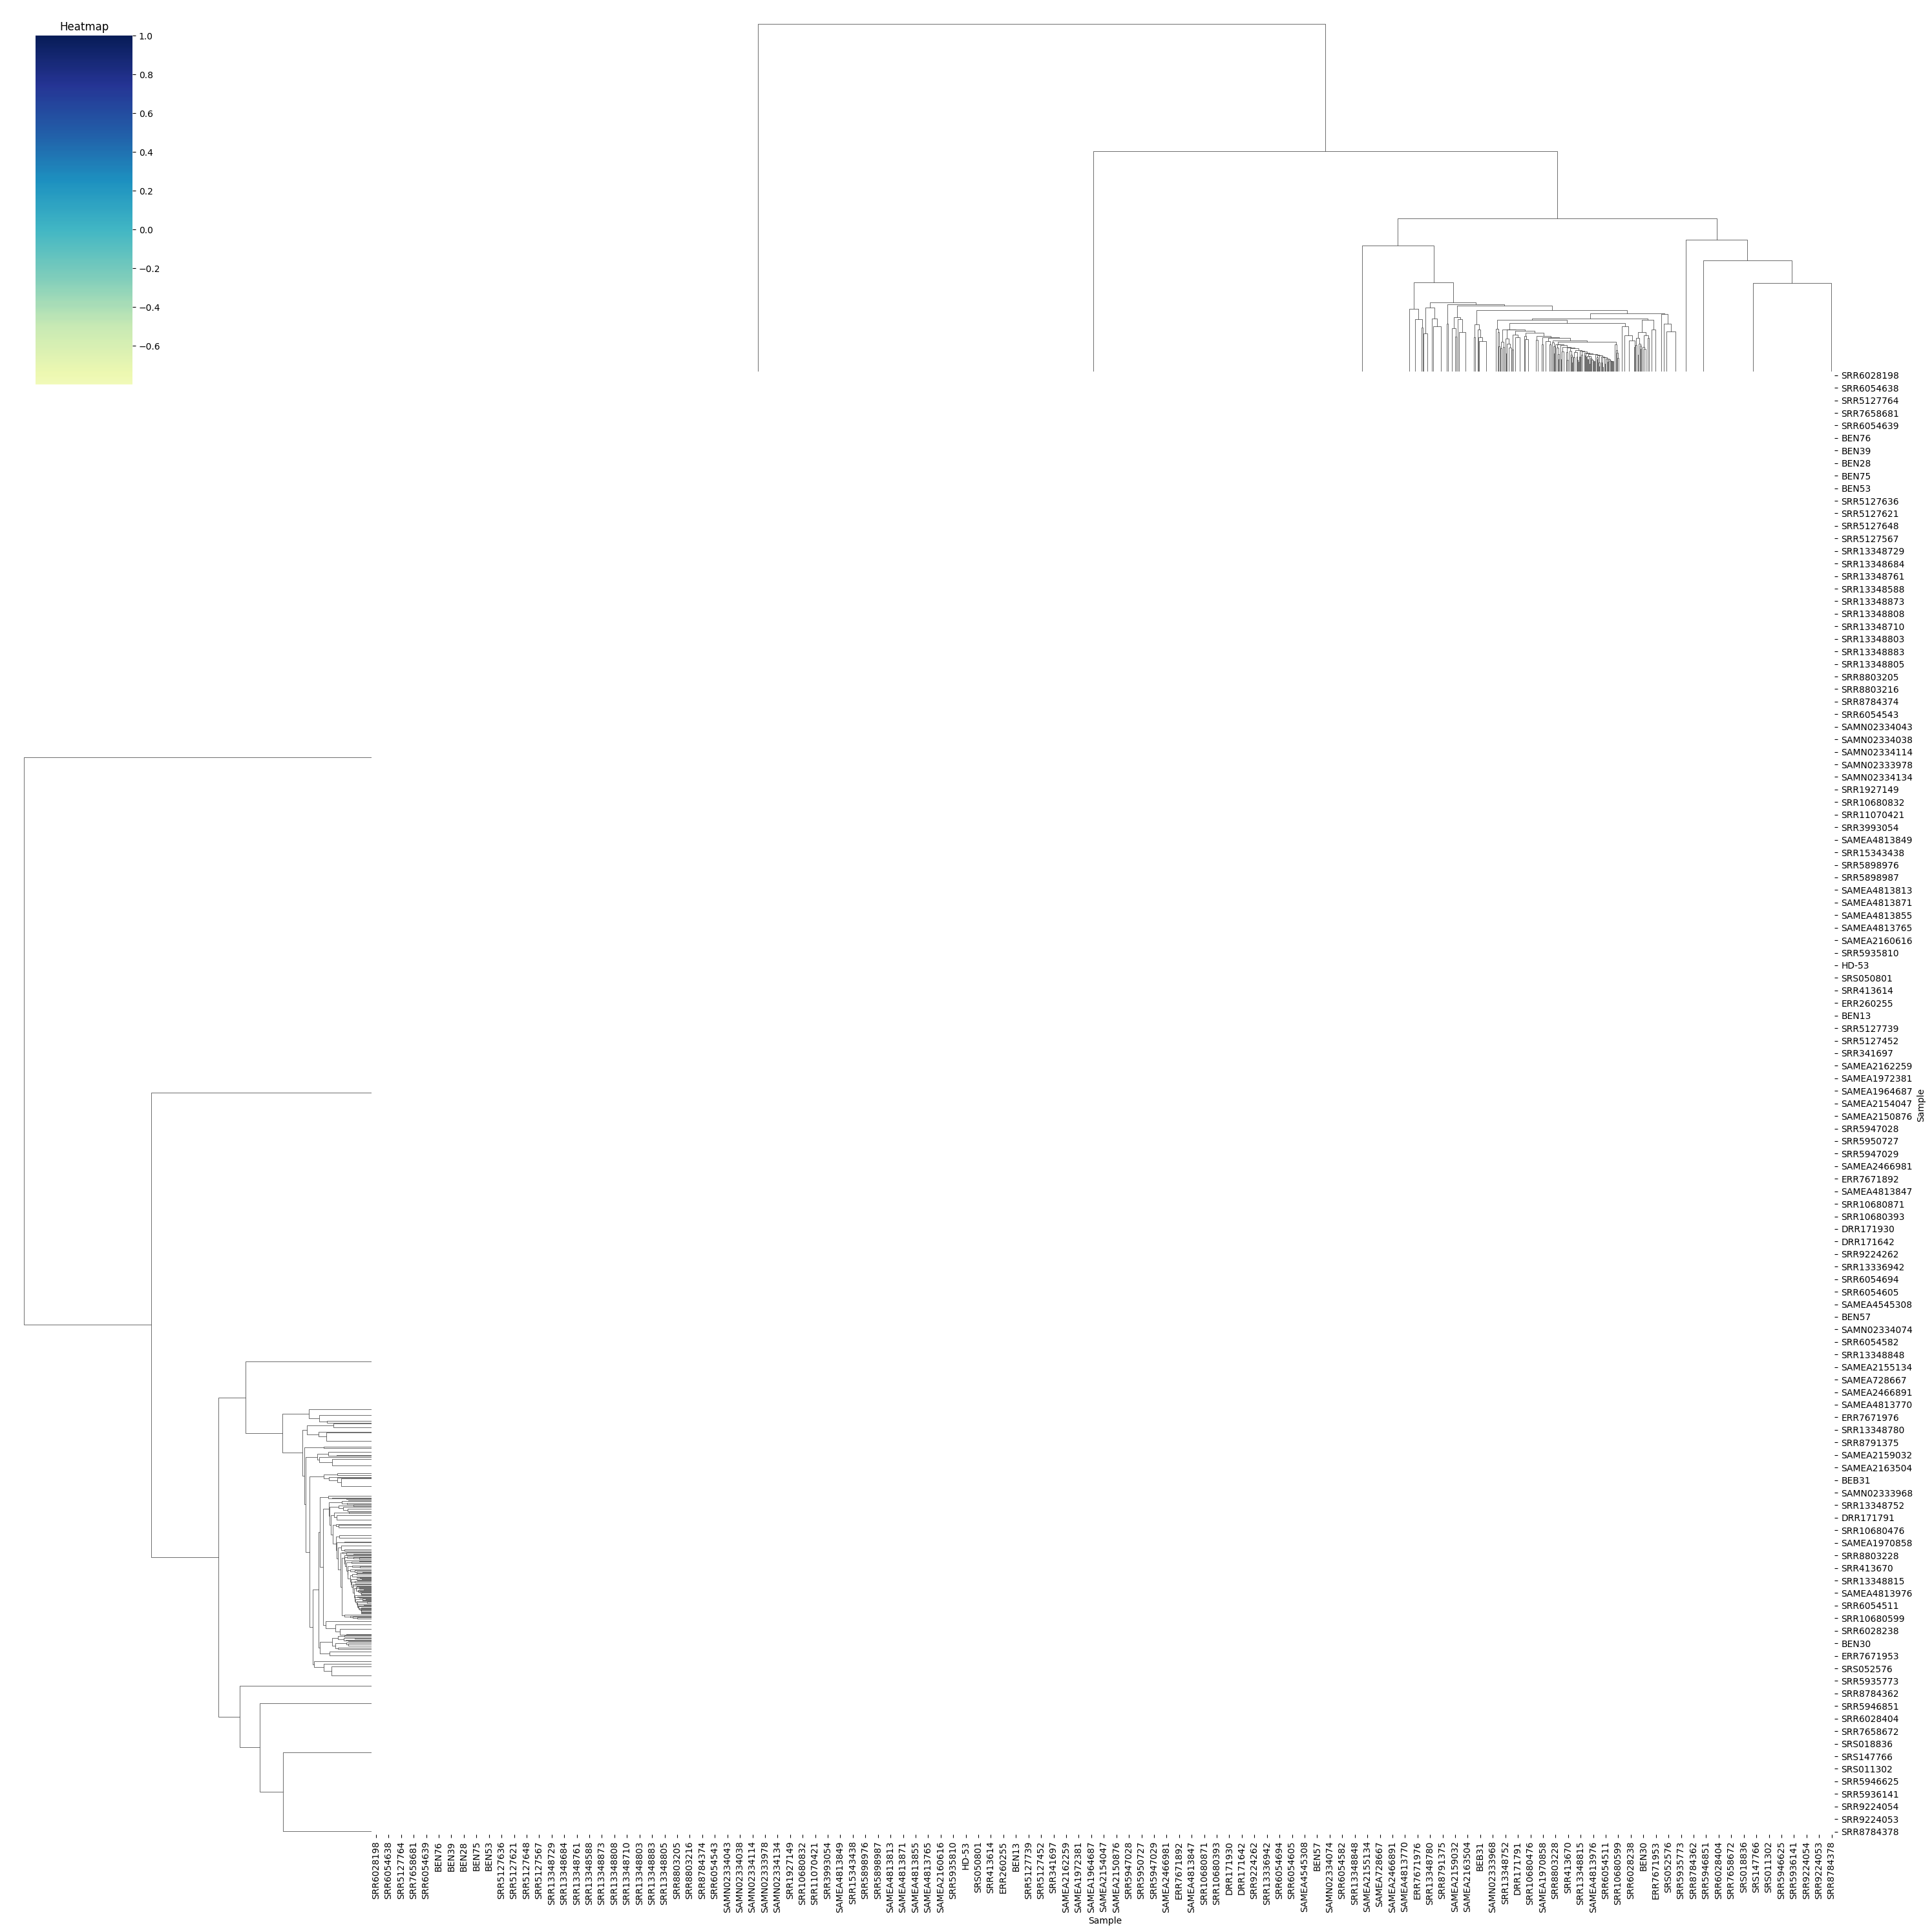

In [55]:
g = sns.clustermap(dfr.T.corr(), center=0, cmap="YlGnBu", linewidths=.75, figsize=(30, 30))
#g.fig.suptitle(heatmap)
#g.ax_heatmap.set_yticklabels()
#g.ax_heatmap.set_xticklabels(dft.lifestyle)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.title("Heatmap")
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
g.savefig('heatmap_2.pdf')
plt.show()

## K-means

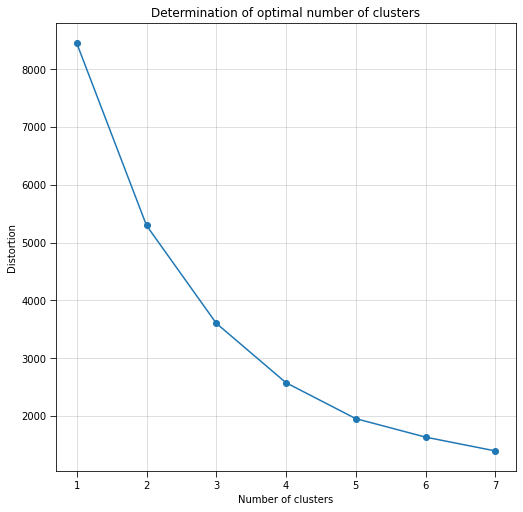

In [34]:
distortions = list()
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=1000,
        tol=1e-05, random_state=0
    )
    km.fit(d)
    distortions.append(km.inertia_)
#endfor
# plot
#fig = plt.figure(figsize=(8.25, 8.25), dpi=300)
fig = plt.figure(figsize=(8.25, 8.25))
ax = plt.subplot(1, 1, 1)


# Labels
plt.title('Determination of optimal number of clusters')
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# Ticks
ax.grid(b=True, which='major', linewidth=1.0, linestyle='-', color='grey',
    alpha=0.25)
ax.tick_params(which='major', length=6)


### Ajuste

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=1000, tol=1e-5, n_init=10)
kmeans.fit(d)
C = kmeans.cluster_centers_

In [36]:
# Vamos a dibujar el resultado
clases = kmeans.predict(d)
kk = dfo.T
kk['clase'] = clases
#
# Agrupamos por clases y representamos...
cfied = kk.groupby('clase')
#
# Números...
print('Group             Cardinality')
print('----------------- ------------')
for c, g in cfied:
    print("%-17s %8d" % (c, len(g)))
#endfor
print('----------------- ------------')

Group             Cardinality
----------------- ------------
0                      251
1                      111
2                      183
----------------- ------------


## Heatmaps....


In [37]:
ddft = dfo.reindex(sorted(accession), axis=1).T
#ddft.reset_index(inplace=True)
#columns = ['accession']
#columns += list(df.taxon)
#ddft.columns = columns
ddft.columns
#for label in ddft.index:
#    ddft.loc[label].sum()

RangeIndex(start=0, stop=2399, step=1)

In [38]:
# Construcción del dataset.
#
# Ordenar las columnas y rotar
dft = dfo.reindex(sorted(accession), axis=1).T
dft.reset_index(inplace=True)
columns = ['accession']
columns += list(df.taxon)
#columns
dft.columns = columns
dft.columns

Index(['accession', 'Faecalibaculum(1729679)', 'Cetobacterium(180162)',
       'Altererythrobacter(361177)', 'Plasmopara(4780)', 'Plasmodium(5820)',
       'Paludisphaera(1763521)', 'Anaerococcus(165779)',
       'Candidatus Solibacter(332162)', 'Pseudoalteromonas(53246)',
       ...
       'Spumella(89043)', 'Polerovirus(119164)', 'Tsukubamonas(1084708)',
       'Lyngbya(28073)', 'Lachnella(139084)', 'Physarum(5790)',
       'Orthoreovirus(10882)', 'Macavirus(548687)', 'Kofleria(224465)',
       'Microvirus(10842)'],
      dtype='object', length=2400)

In [39]:
#
# Añadimos las etiquetas
#
# Ordenamos ambos subconjuntos...
labels.sort_values(by=['run_accession'], inplace=True)
dft.sort_values(by='accession', inplace=True)

dft['country'] = list(labels.country)
dft['age'] = list(labels.host_age)
dft['lifestyle'] = list(labels.host_lifestyle)
dft.columns

Index(['accession', 'Faecalibaculum(1729679)', 'Cetobacterium(180162)',
       'Altererythrobacter(361177)', 'Plasmopara(4780)', 'Plasmodium(5820)',
       'Paludisphaera(1763521)', 'Anaerococcus(165779)',
       'Candidatus Solibacter(332162)', 'Pseudoalteromonas(53246)',
       ...
       'Lyngbya(28073)', 'Lachnella(139084)', 'Physarum(5790)',
       'Orthoreovirus(10882)', 'Macavirus(548687)', 'Kofleria(224465)',
       'Microvirus(10842)', 'country', 'age', 'lifestyle'],
      dtype='object', length=2403)

In [40]:
# 
# Normalizamos de nuevo los valores...
droppable = ['accession', 'country', 'age', 'lifestyle']
cols_to_norm = [item for item in list(dft.columns) if item not in droppable]
dft[cols_to_norm] = dft[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

In [41]:
km = dft[cols_to_norm].apply(lambda x: (x.mean()), axis=0)
ks = dft[cols_to_norm].apply(lambda x: (x.std()), axis=0)
km['Faecalibaculum(1729679)']

3.259691772161666e-05

In [42]:
# Obtenemos la lista de taxones
taxons = np.array(list(km.index))
lifestyle = np.array(list(dft.lifestyle))

In [43]:
taxons[-15:]

array(['Candidatus Nephrothrix(1659686)', 'Cyprinivirus(692606)',
       'Dictyocha(35686)', 'Slashvirus(1921709)', 'Erioderma(243191)',
       'Spumella(89043)', 'Polerovirus(119164)', 'Tsukubamonas(1084708)',
       'Lyngbya(28073)', 'Lachnella(139084)', 'Physarum(5790)',
       'Orthoreovirus(10882)', 'Macavirus(548687)', 'Kofleria(224465)',
       'Microvirus(10842)'], dtype='<U40')

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


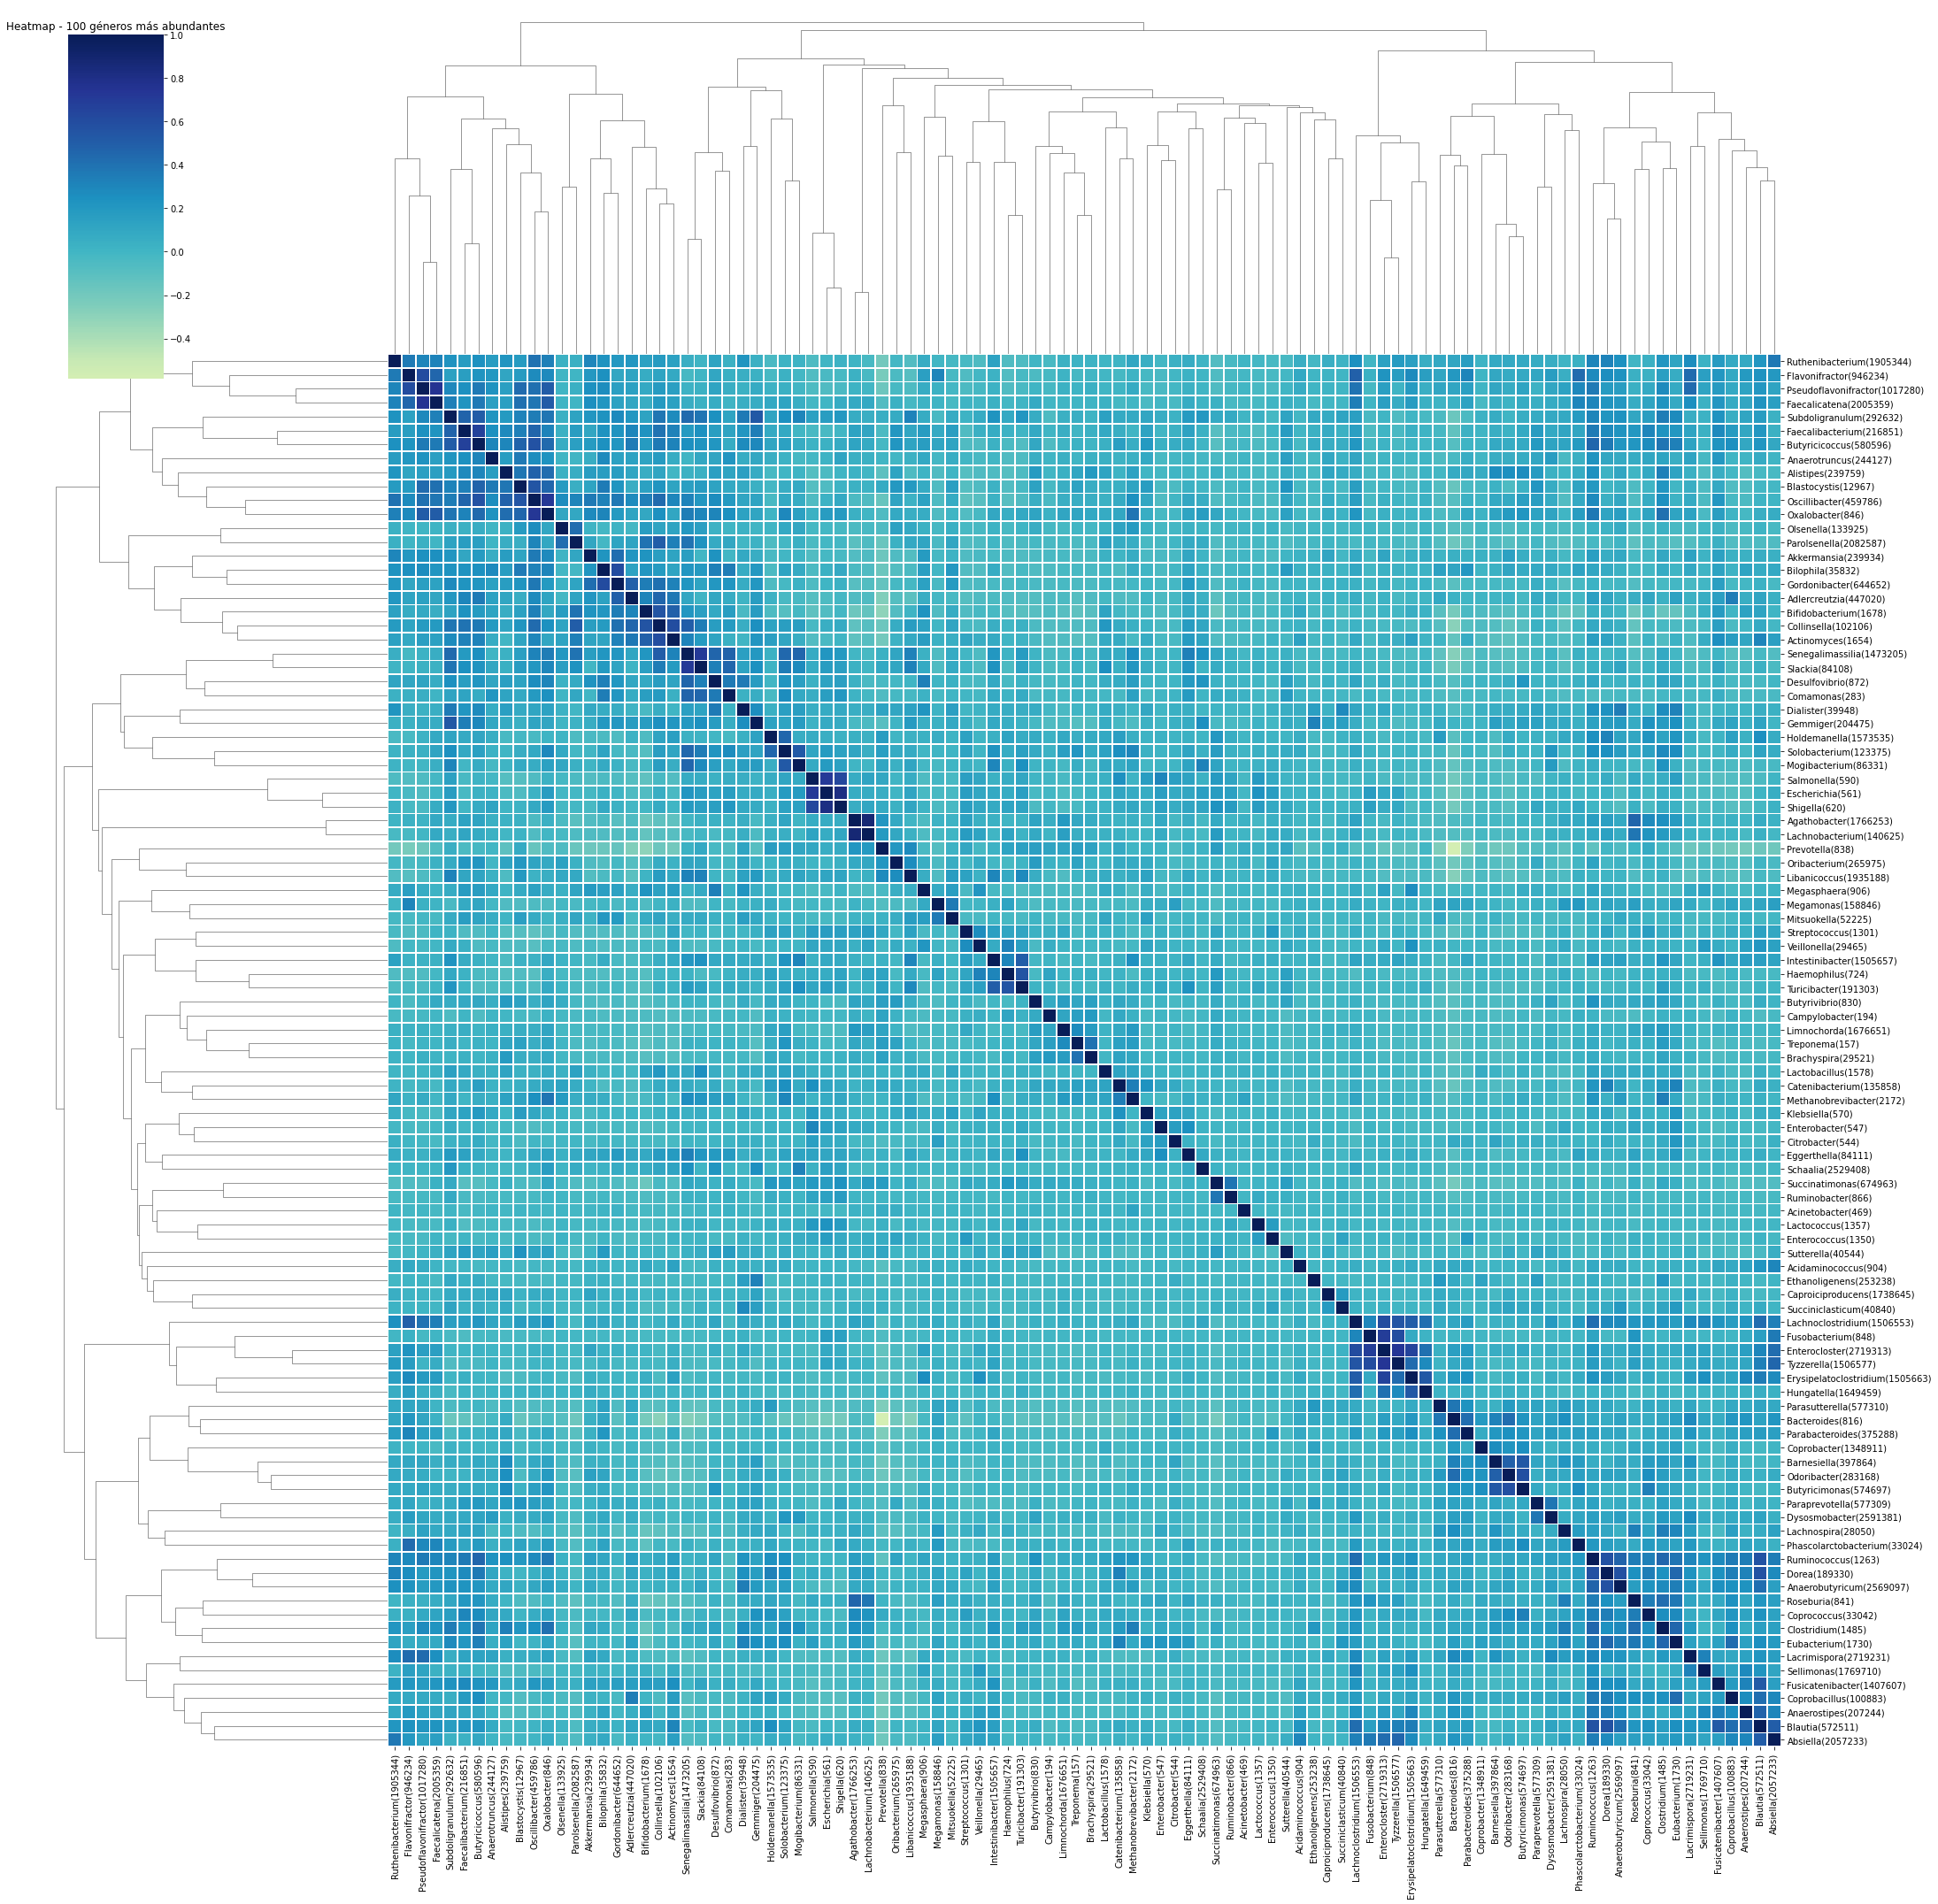

In [49]:
#g = sns.clustermap(dft[cols_to_norm],
g = sns.clustermap(dft[abundant_taxons].corr(), center=0, cmap="YlGnBu",
    linewidths=.75, figsize=(30, 30))
#g.fig.suptitle(heatmap)
#g.ax_heatmap.set_yticklabels()
#g.ax_heatmap.set_xticklabels(dft.lifestyle)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.title("Heatmap - 100 géneros más abundantes")
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
g.savefig('heatmap.pdf')

In [50]:
#
# Un intento de eliminar los valores menos interesantes...
# Dibujamos el heatmap sólo con los valores de media más alta... Digamos los 50 más abundantes...
abundant_taxons = list()
for i in range(len(taxons)-1, len(taxons)-51, -1):
    abundant_taxons.append(taxons[i])
#enddef

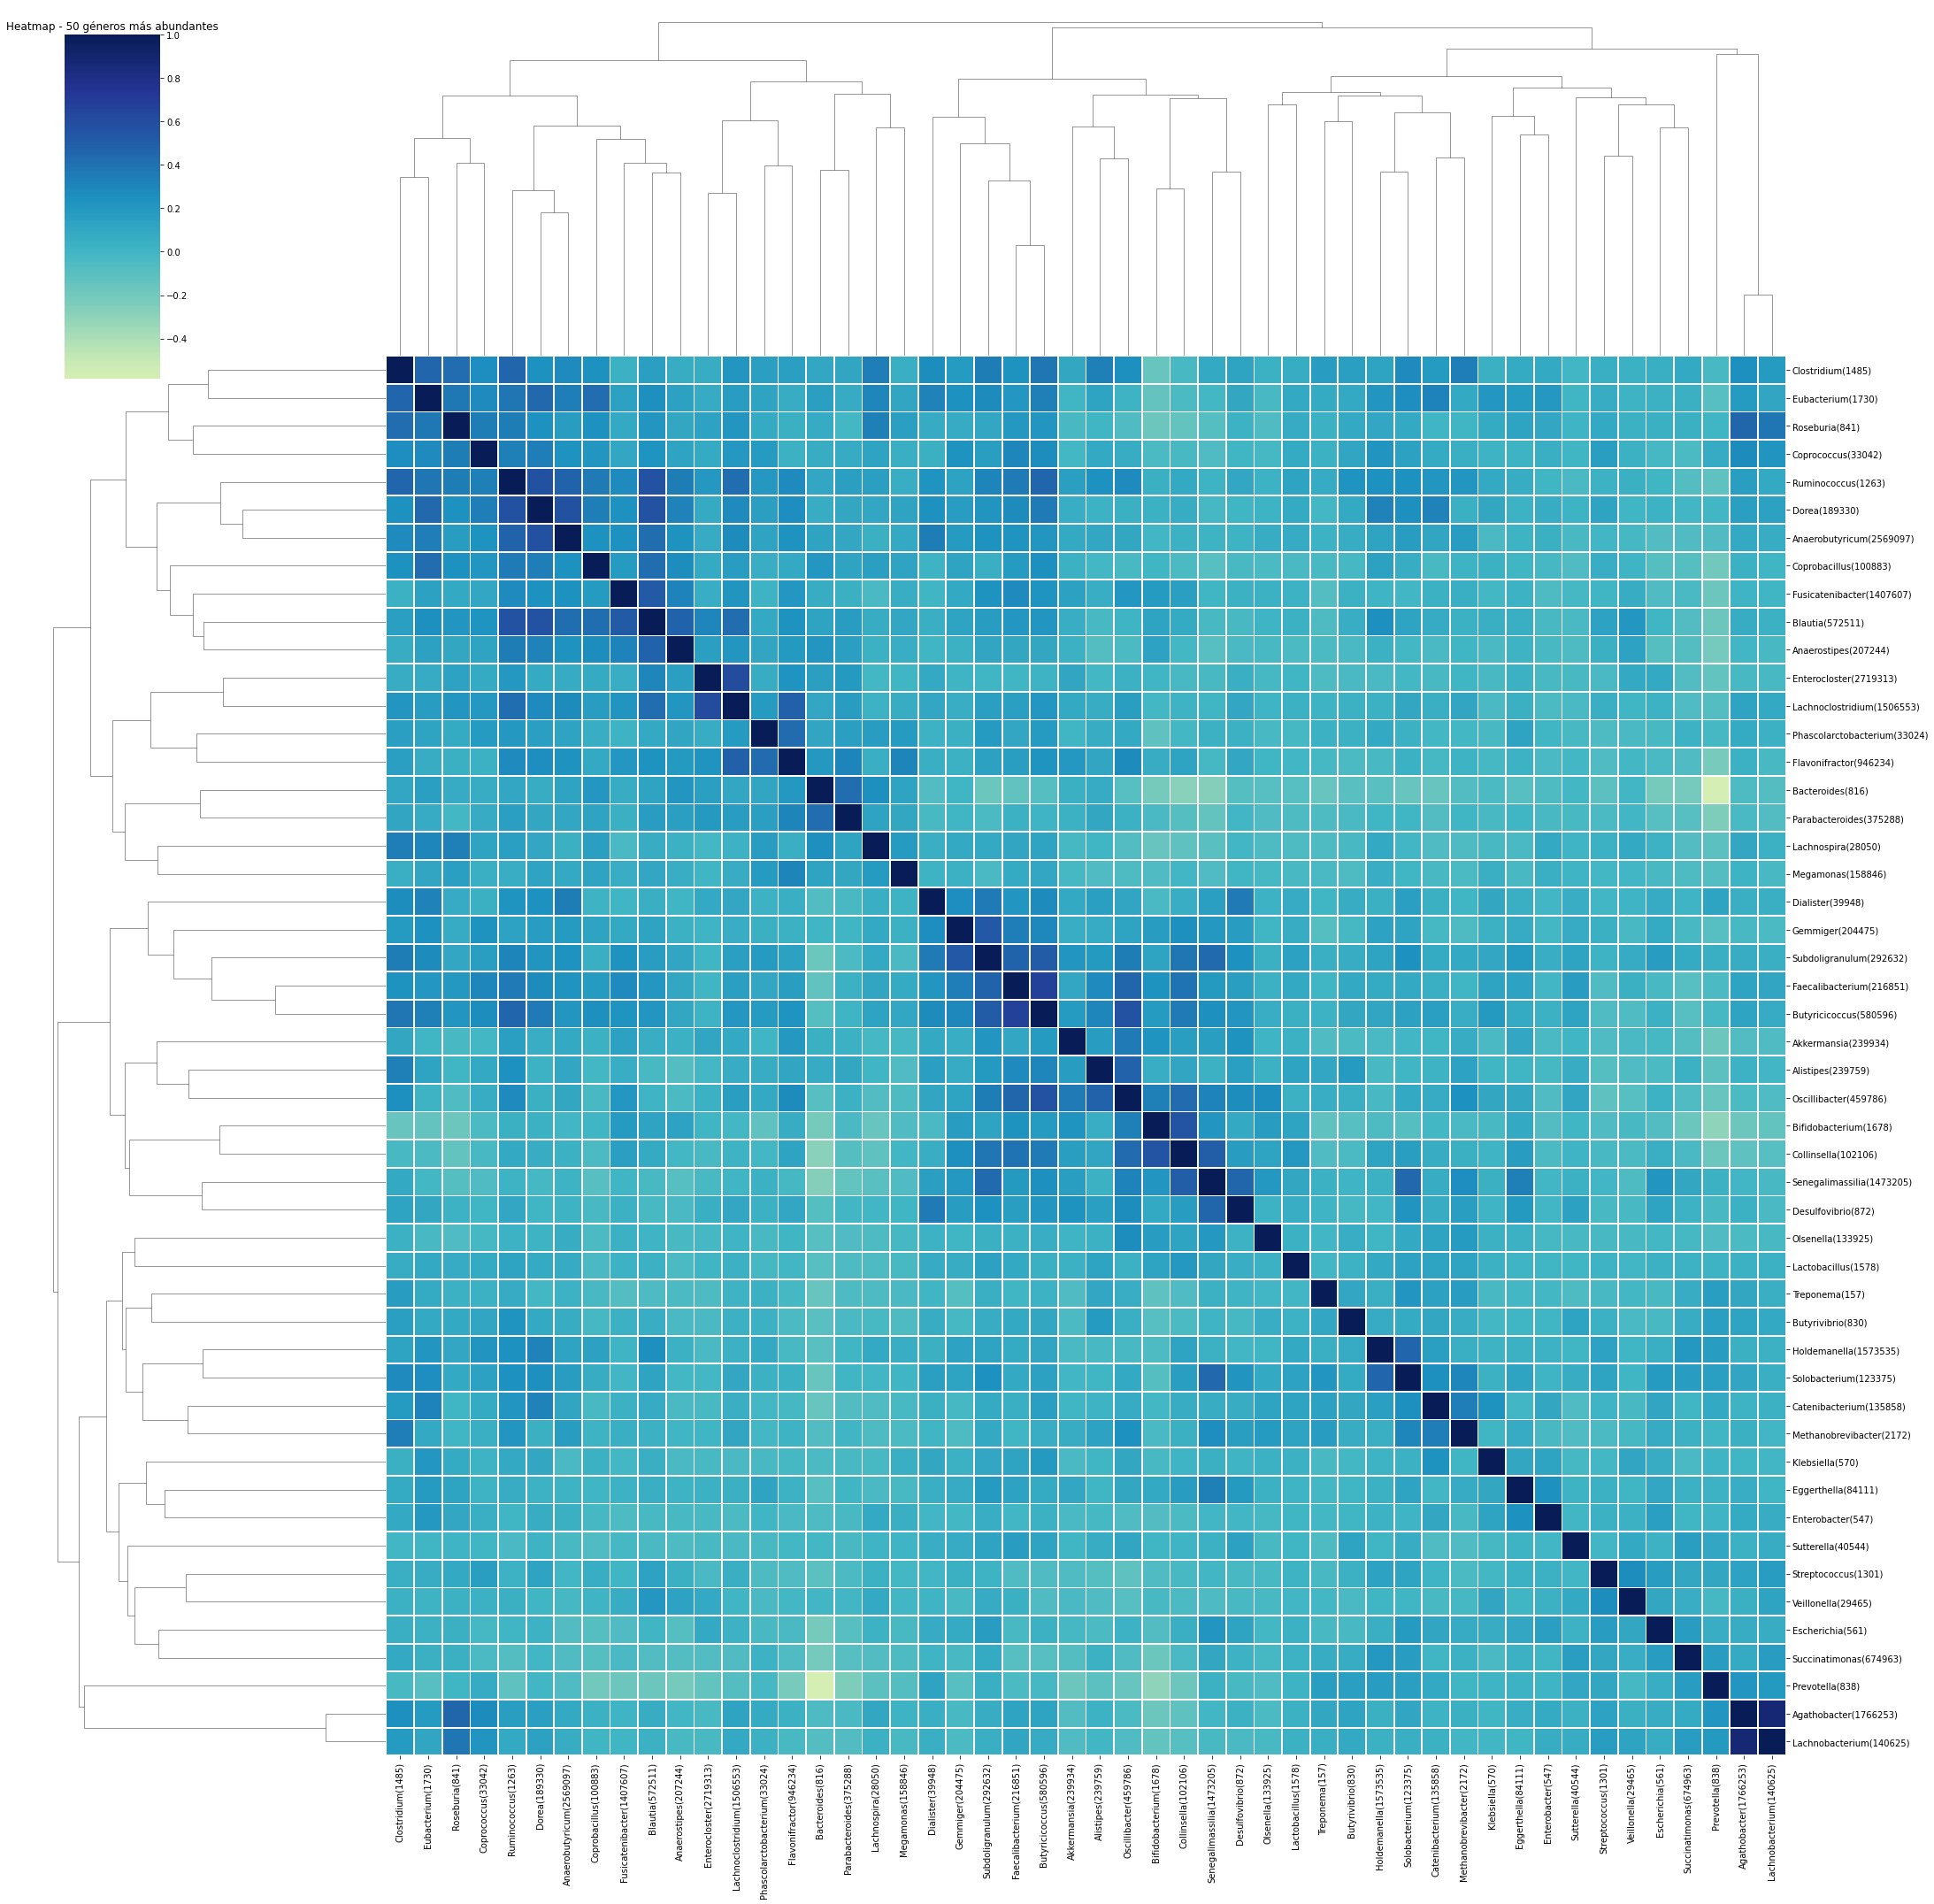

In [51]:
#g = sns.clustermap(dft[cols_to_norm],
g = sns.clustermap(dft[abundant_taxons].corr(), center=0, cmap="YlGnBu",
    linewidths=.75, figsize=(30, 30))
#g.fig.suptitle(heatmap)
#g.ax_heatmap.set_yticklabels()
#g.ax_heatmap.set_xticklabels(dft.lifestyle)
plt.title("Heatmap - 50 géneros más abundantes")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
g.savefig('heatmap_50.pdf')

In [52]:
#
# Un intento de eliminar los valores menos interesantes...
# Dibujamos el heatmap sólo con los valores de media más alta... Digamos los 50 más abundantes...
abundant_taxons = list()
for i in range(len(taxons)-1, len(taxons)-21, -1):
    abundant_taxons.append(taxons[i])
#enddef

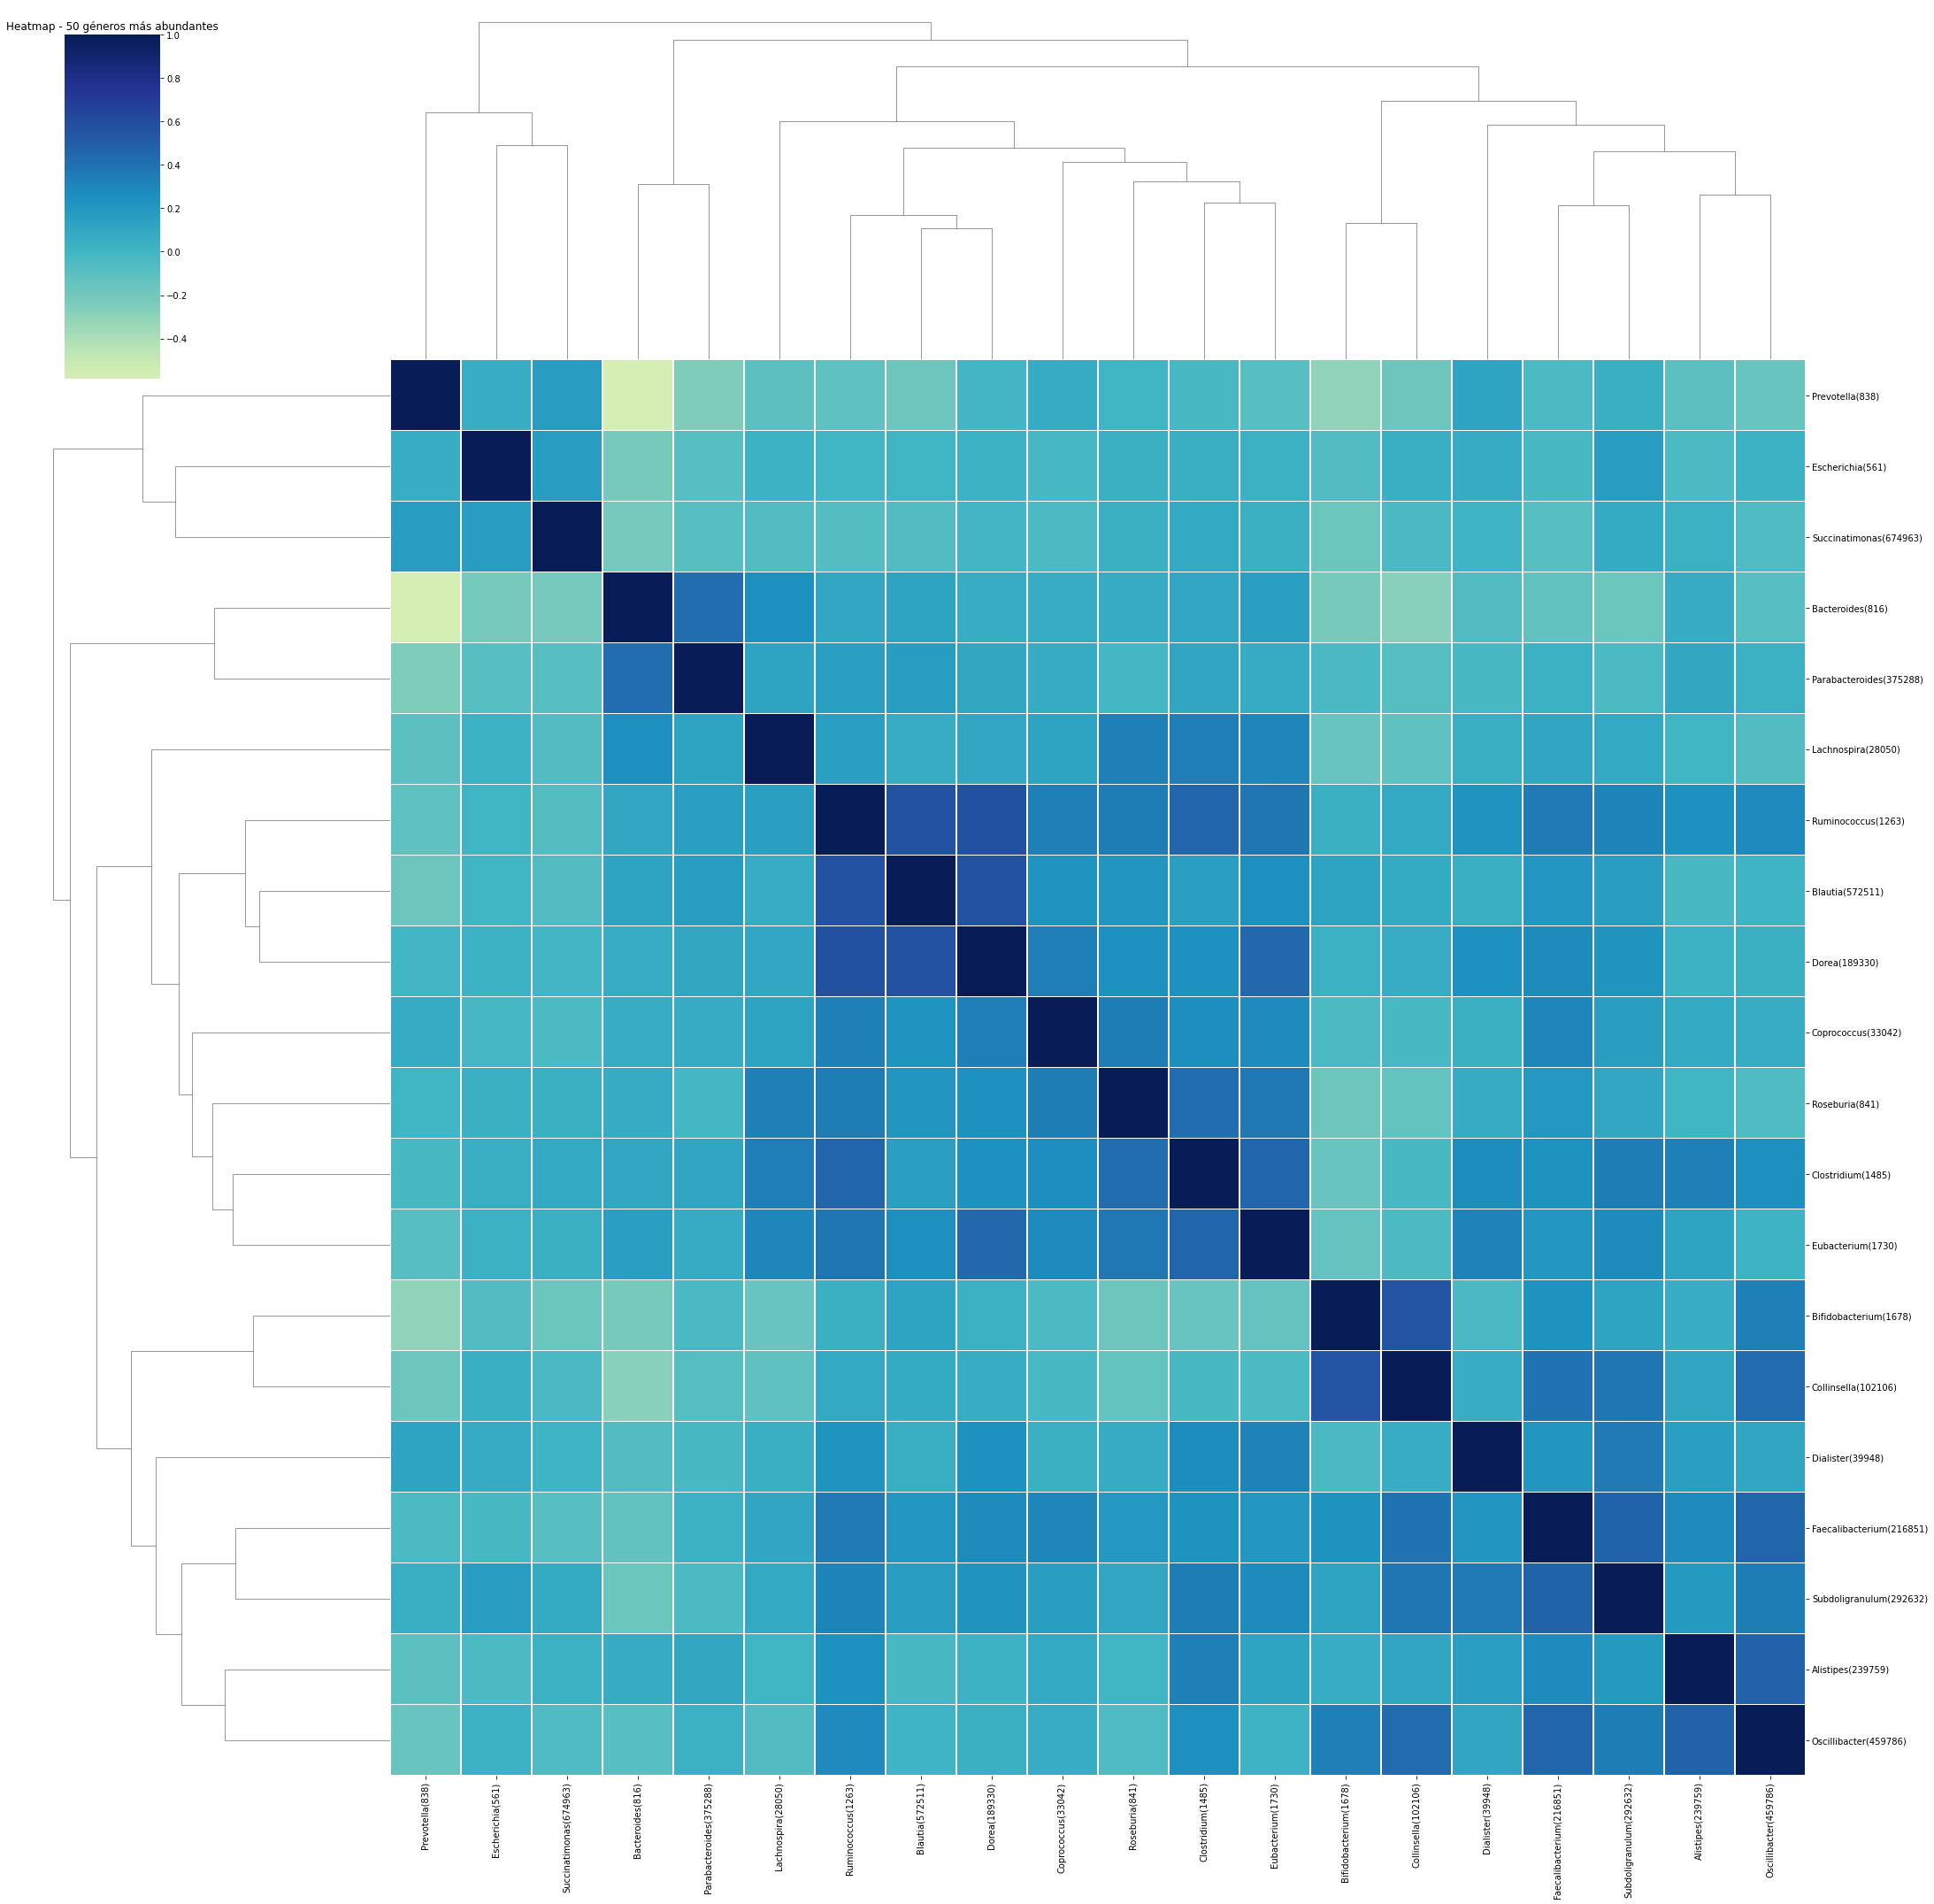

In [53]:
#g = sns.clustermap(dft[cols_to_norm],
g = sns.clustermap(dft[abundant_taxons].corr(), center=0, cmap="YlGnBu",
    linewidths=.75, figsize=(30, 30))
#g.fig.suptitle(heatmap)
#g.ax_heatmap.set_yticklabels()
#g.ax_heatmap.set_xticklabels(dft.lifestyle)
plt.title("Heatmap - 50 géneros más abundantes")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
g.savefig('heatmap_20.pdf')

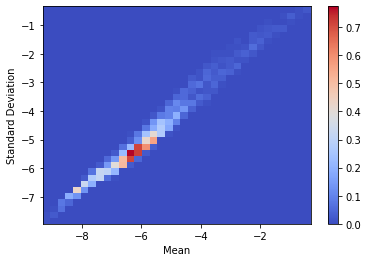

In [54]:
lmeans = np.log10(means)
lstdev = np.log10(stdev)
cmap = plt.get_cmap('coolwarm')
fig, ax = plt.subplots()
h, xedge, yedge, image = plt.hist2d(lmeans, lstdev, bins=30, density=True, cmap=cmap)
h = ax.hist2d(lmeans, lstdev, bins=35, cmap=cmap)
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.colorbar(image, ax=ax)
plt.savefig('histograma_2d.pdf')